# 1. Import packages

In [24]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

# 2. Generate dataset

In [25]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

# 3. Test the row / col orders & add selected rows labels

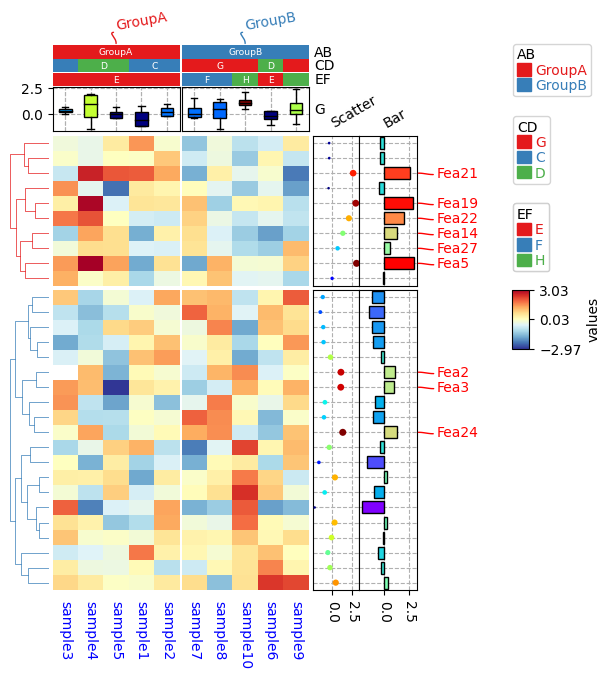

In [14]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
                           Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=12,cmap='jet',legend=False),
                           Bar=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=15,cmap='rainbow',legend=False),
                           selected=anno_label(df_rows,colors='red',relpos=(-0.05,0.4)),
                           label_kws={'rotation':30,'horizontalalignment':'left','verticalalignment':'bottom'},
                            axis=0,verbose=0)

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=10),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True),
                           EF=anno_simple(df.EF,add_text=True,
                                            legend_kws={'frameon':True}),
                           G=anno_boxplot(df_box, cmap='jet',legend=False),
                           verbose=0)

plt.figure(figsize=(5.5, 6.5))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_cluster=True,row_cluster=True,
                       col_split=df.AB,row_split=2, 
                       col_split_gap=0.5,row_split_gap=0.8,
                       label='values',row_dendrogram=True,
                       show_rownames=False,show_colnames=True,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()

              AB CD EF         F
sample1   GroupA  C  E  0.459770
sample2   GroupA  C  E -1.361623
sample3   GroupA  C  E  0.347447
sample4   GroupA  D  E -0.731714
sample5   GroupA  D  E  0.248627
sample6   GroupB  D  E -0.584103
sample7   GroupB  G  F  0.769263
sample8   GroupB  G  F -0.939622
sample9   GroupB  G  H -1.546546
sample10  GroupB  G  H -0.491615
sample1    -0.403170
sample2     0.238585
sample3     0.281133
sample4     0.588616
sample5    -0.220639
sample6    -0.006886
sample7     0.237652
sample8     0.229413
sample9     0.559882
sample10    1.157378
dtype: float64
        sample1   sample2   sample3   sample4   sample5   sample6   sample7  \
Fea1  -0.015578 -0.171340  0.752664 -1.059520 -1.041959 -1.591430  1.930921   
Fea2   0.128718 -0.141043 NaN        1.072654 -1.665664 -0.604844 -0.767248   
Fea3   0.507167  0.282648  1.391794  1.047842 -2.965330  0.106415 -1.307715   
Fea4  -0.620969  1.277754  0.911879 -1.207388 -0.185212  0.233992  1.007745   
Fea5  -1.785109  

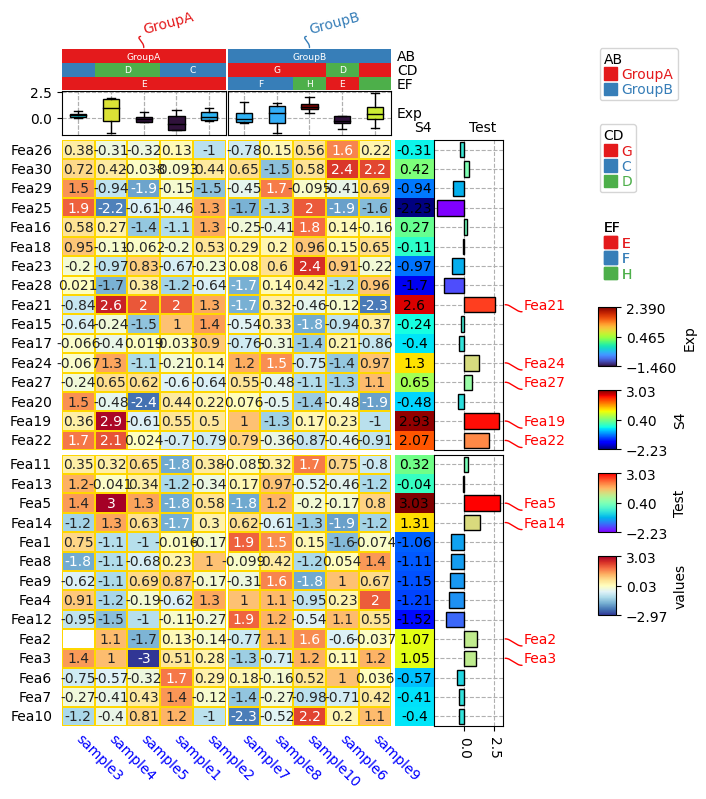

[['Fea26', 'Fea30', 'Fea29', 'Fea25', 'Fea16', 'Fea18', 'Fea23', 'Fea28', 'Fea21', 'Fea15', 'Fea17', 'Fea24', 'Fea27', 'Fea20', 'Fea19', 'Fea22'], ['Fea11', 'Fea13', 'Fea5', 'Fea14', 'Fea1', 'Fea8', 'Fea9', 'Fea4', 'Fea12', 'Fea2', 'Fea3', 'Fea6', 'Fea7', 'Fea10']]
[['sample3', 'sample4', 'sample5', 'sample1', 'sample2'], ['sample7', 'sample8', 'sample10', 'sample6', 'sample9']]


In [16]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                           add_text=True,height=10,
                                           text_kws={'rotation':0,'fontsize':10,'color':'black'}),
                           # Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                           #                  height=10),
                           Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=18,cmap='rainbow'),
                           selected=anno_label(df_rows,colors='red'),
                           axis=0,verbose=0,label_kws={'rotation':0,'horizontalalignment':'left','verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True),
                           EF=anno_simple(df.EF,add_text=True,
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           verbose=0) #verbose=0 will turn off the log.

print(df)
print(df_box.mean(axis=1))
print(df_heatmap)
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_split=df.AB,
                       row_split=df_rows.XY, col_split_gap=0.5,row_split_gap=1,
                       col_cluster=True,row_cluster=True,
                       label='values',row_dendrogram=False,show_rownames=True,show_colnames=True,
                         tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,
                       annot=True,linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                      xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()
print(cm.row_order)
print(cm.col_order)

# 4. Annotations

In [17]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
print(df)
print(df_box)
print(df_scatter)
print(df_bar)
print(df_bar1)
print(df_bar2)
print(df_bar3)
print(df_bar4)

              AB CD         F
sample1   AAAA1   C -0.692155
sample2   AAAA1   C -0.469601
sample3   AAAA1   C  0.242067
sample4   AAAA1   D  0.640309
sample5   AAAA1   D  0.882816
sample6   BBBBB2  D  1.251123
sample7   BBBBB2  G -0.020933
sample8   BBBBB2  G -0.783565
sample9   BBBBB2  G  0.878020
sample10  BBBBB2  G -0.681863
             Gene1     Gene2     Gene3     Gene4
sample1  -0.607762  0.165771  1.036499  0.456394
sample2   1.165200 -0.814720 -0.641677 -0.033440
sample3   0.743532 -0.357810  1.670981  0.484411
sample4  -0.104202  0.243068 -0.377435  1.135752
sample5   1.234105  0.089280 -0.245086 -0.386212
sample6   0.384836 -0.075733  0.309002  0.140744
sample7  -0.346516 -0.249676  1.150757 -1.047913
sample8   1.127884 -0.306359 -0.611776 -0.448487
sample9  -0.857663 -0.646660 -0.485620  0.378843
sample10 -0.025649  1.157981 -0.420284 -0.219346
           Scatter
sample1   6.210406
sample2   2.166666
sample3   8.162578
sample4   1.726821
sample5   2.124185
sample6   2.89749

Starting plotting HeatmapAnnotations


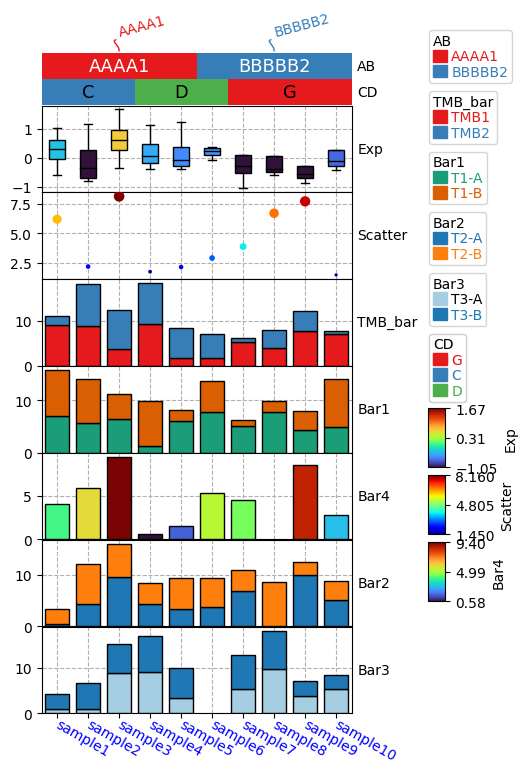

In [18]:
plt.figure(figsize=(4, 8))
col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,legend_gap=3)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

## Change orentation `down` and add extra space

Starting plotting HeatmapAnnotations


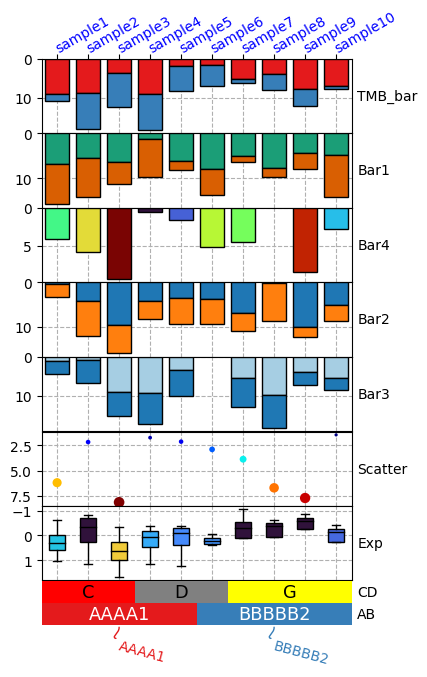

In [19]:
plt.figure(figsize=(4, 8))
row_ha = HeatmapAnnotation(
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                            Scatter=anno_scatterplot(df_scatter), 
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                                           add_text=True,legend=True,text_kws={'color':'black'}),
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            label=anno_label(df.AB, merge=True,rotation=-15),
                           plot=True,plot_legend=False,legend_hpad=13,axis=1,
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=30)
plt.show()
# Here, we can use hgap (when axis=1) or wgap (when axis=0) to control the widh of height space between different annotations.

## Change orentation to the left

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


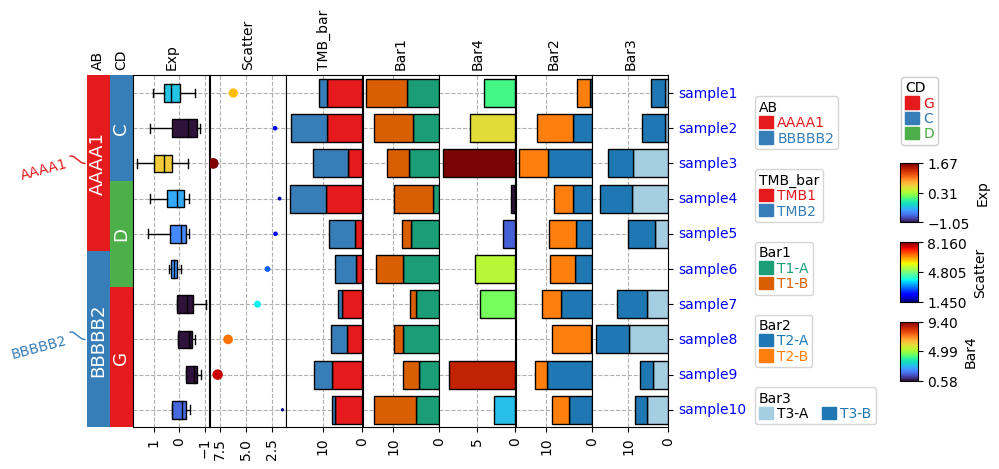

In [20]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,legend_gap=5,
                           axis=0,legend_hpad=20
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=0)
plt.show()

## Change orentation to the right

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


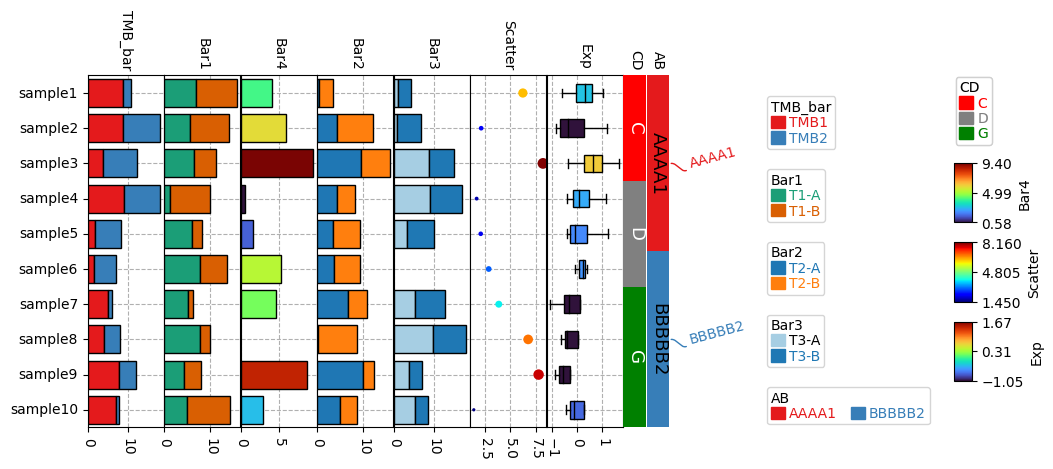

In [21]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                            Scatter=anno_scatterplot(df_scatter), 
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'green'},
                                           add_text=True,legend=True,text_kws={'rotation':-90}),
                            AB=anno_simple(df.AB,add_text=True,legend=True,text_kws={'rotation':-90,'color':'black'}),
                            label=anno_label(df.AB, merge=True,rotation=15),
                           plot=True,legend=True,legend_hpad=13,legend_gap=5,axis=0
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'black'},rotation=0)
plt.show()

## Changing orientation using parameter `orientation` 
By Default, if there is no `anno_label` in the annotation, the oriention would be determined by parameter `orientation`.

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


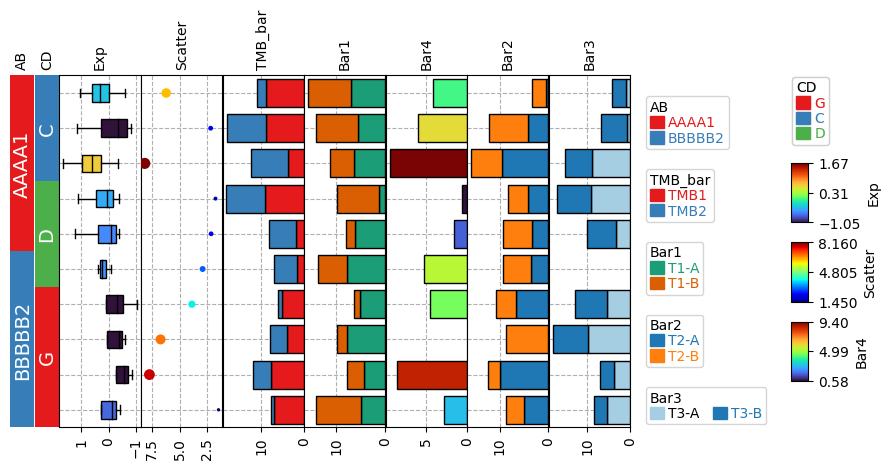

In [22]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,axis=0,
                            legend_gap=5,orientation='left',
                            )
plt.show()

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


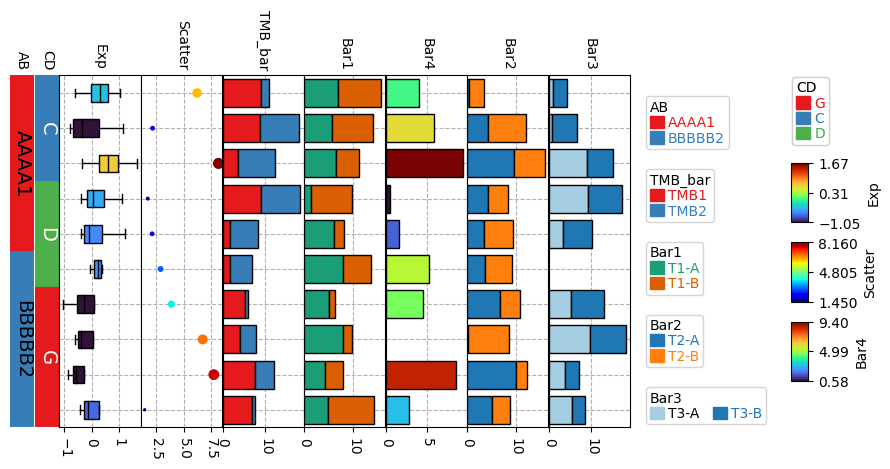

In [23]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
                            AB=anno_simple(df.AB,add_text=True,legend=True,
                                          text_kws={'rotation':-90,'fontsize':14,'color':'black'}),
                            CD=anno_simple(df.CD,add_text=True,legend=True,
                                          text_kws={'rotation':-90,'fontsize':14,'color':'white'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,axis=0,
                            legend_gap=5,orientation='right',
                            )
plt.show()